In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sstats
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import tree

%matplotlib inline

In [22]:
customers = pd.read_csv('customers.csv')
pd.options.display.max_columns = 30

In [23]:
customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [24]:
customers.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], 
               inplace=True)

In [25]:
customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [38]:
# customers[["Income_Category"]].value_counts()
# customers[["Customer_Age"]].value_counts()
customers[["Education_Level"]].value_counts()

Education_Level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64

In [39]:
customers[["Marital_Status"]].value_counts()

Marital_Status
Married           4687
Single            3943
Unknown            749
Divorced           748
dtype: int64

In [40]:
customers[["Income_Category"]].value_counts()

Income_Category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
dtype: int64

In [48]:
customers[["Card_Category"]].value_counts()

Card_Category
Blue             9436
Silver            555
Gold              116
Platinum           20
dtype: int64

In [47]:
for column in customers.columns:
    print(customers[[column]].isna().sum(), "\n")

CLIENTNUM    0
dtype: int64 

Attrition_Flag    0
dtype: int64 

Customer_Age    0
dtype: int64 

Gender    0
dtype: int64 

Dependent_count    0
dtype: int64 

Education_Level    0
dtype: int64 

Marital_Status    0
dtype: int64 

Income_Category    0
dtype: int64 

Card_Category    0
dtype: int64 

Months_on_book    0
dtype: int64 

Total_Relationship_Count    0
dtype: int64 

Months_Inactive_12_mon    0
dtype: int64 

Contacts_Count_12_mon    0
dtype: int64 

Credit_Limit    0
dtype: int64 

Total_Revolving_Bal    0
dtype: int64 

Avg_Open_To_Buy    0
dtype: int64 

Total_Amt_Chng_Q4_Q1    0
dtype: int64 

Total_Trans_Amt    0
dtype: int64 

Total_Trans_Ct    0
dtype: int64 

Total_Ct_Chng_Q4_Q1    0
dtype: int64 

Avg_Utilization_Ratio    0
dtype: int64 



In [44]:
data = customers.copy()
data["Target"] = (customers["Attrition_Flag"] == "Attrited Customer").astype(np.int8)
data.drop(columns="Attrition_Flag", inplace=True)
data["Flag_Male"] = (customers["Gender"] == "M").astype(np.int8)
data.drop(columns="Gender", inplace=True)
data["Income_Category"] = data["Income_Category"].replace(["Less than $40K", 
                                                           "$40K - $60K",
                                                           "$60K - $80K",
                                                           "$80K - $120K",
                                                           "$120K +",
                                                           "Unknown"],
                                                          [20,50,70,100,140,None])
data["Card_Category"] = data["Card_Category"].replace(["Blue", 
                                                       "Silver",
                                                       "Gold",
                                                       "Platinum"],
                                                      [0,1,2,3])

# Exploratory data analysis

In [42]:
data

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Target,Flag_Male
0,768805383,45,3,High School,Married,70.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,818770008,49,5,Graduate,Single,20.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0
2,713982108,51,3,Graduate,Married,100.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,769911858,40,4,High School,Unknown,20.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0
4,709106358,40,3,Uneducated,Married,70.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Graduate,Single,50.0,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1
10123,710638233,41,2,Unknown,Divorced,50.0,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,1
10124,716506083,44,1,High School,Married,20.0,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0
10125,717406983,30,2,Graduate,Unknown,50.0,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,1


In [70]:
customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


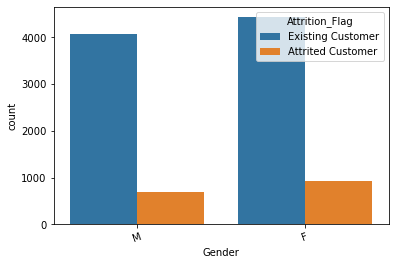

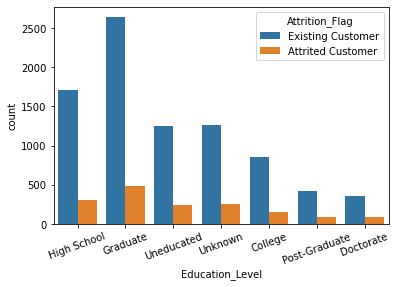

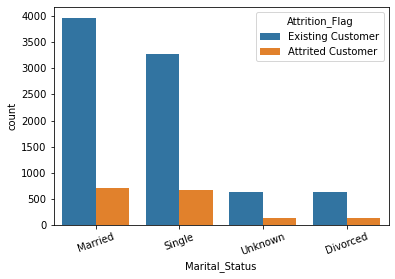

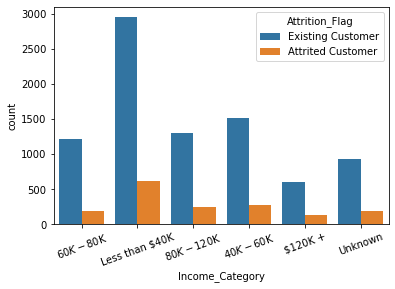

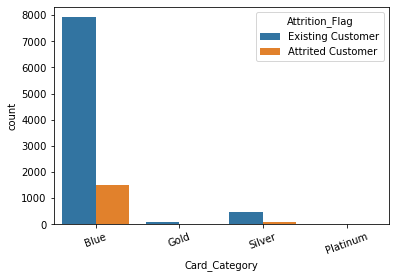

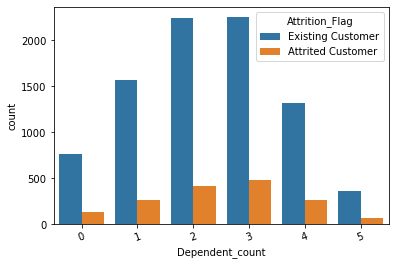

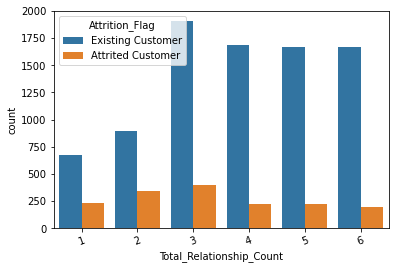

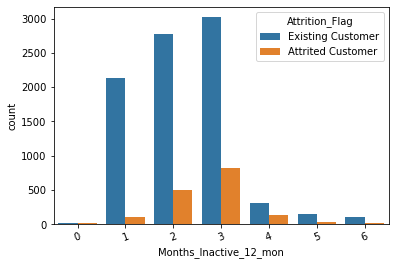

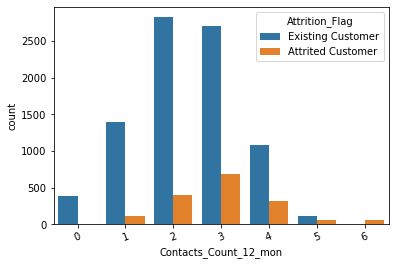

In [60]:
for x in ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
         "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon"]:
    g = sns.countplot(x=x, data=customers, hue="Attrition_Flag")
    plt.xticks(rotation=20)
    plt.show()

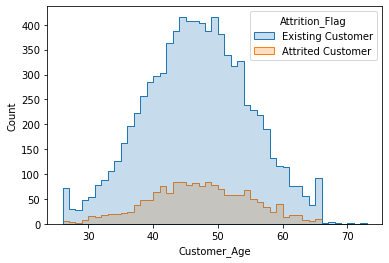

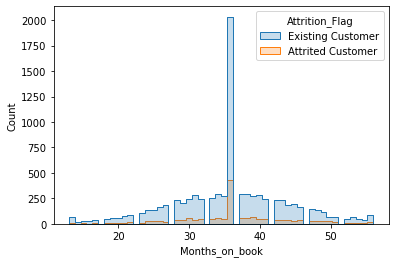

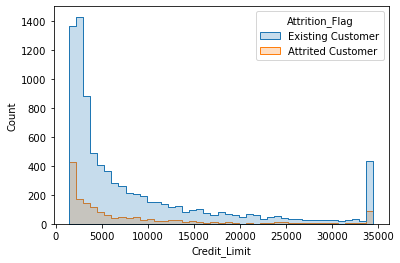

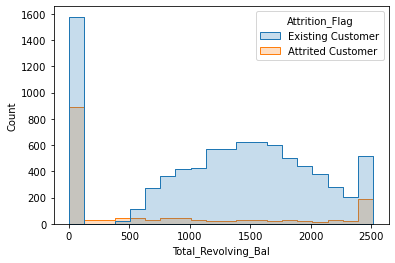

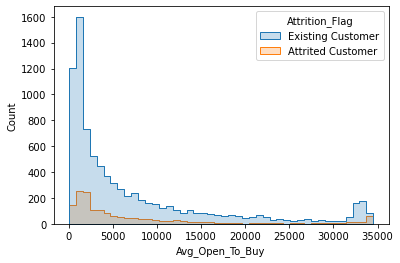

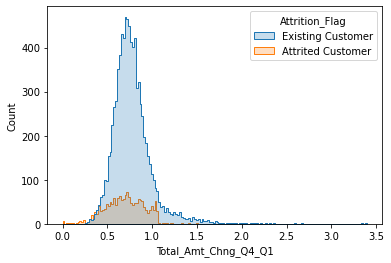

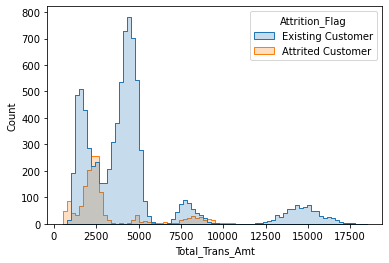

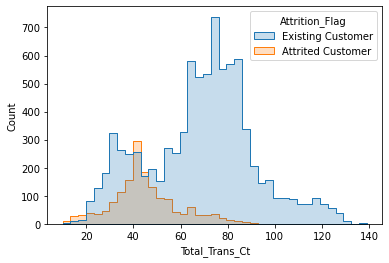

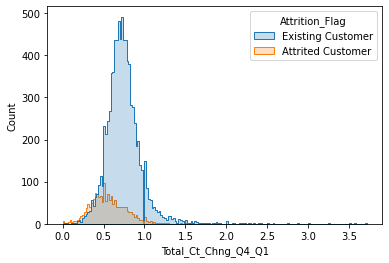

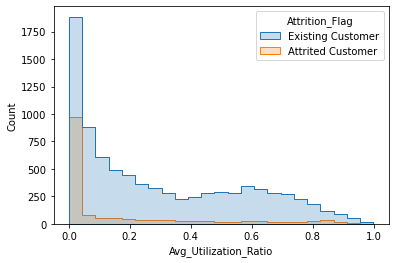

In [62]:
for x in ["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy",
         "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", 
          "Avg_Utilization_Ratio"]:
    sns.histplot(customers, x=x, hue="Attrition_Flag", element="step")
    plt.show()

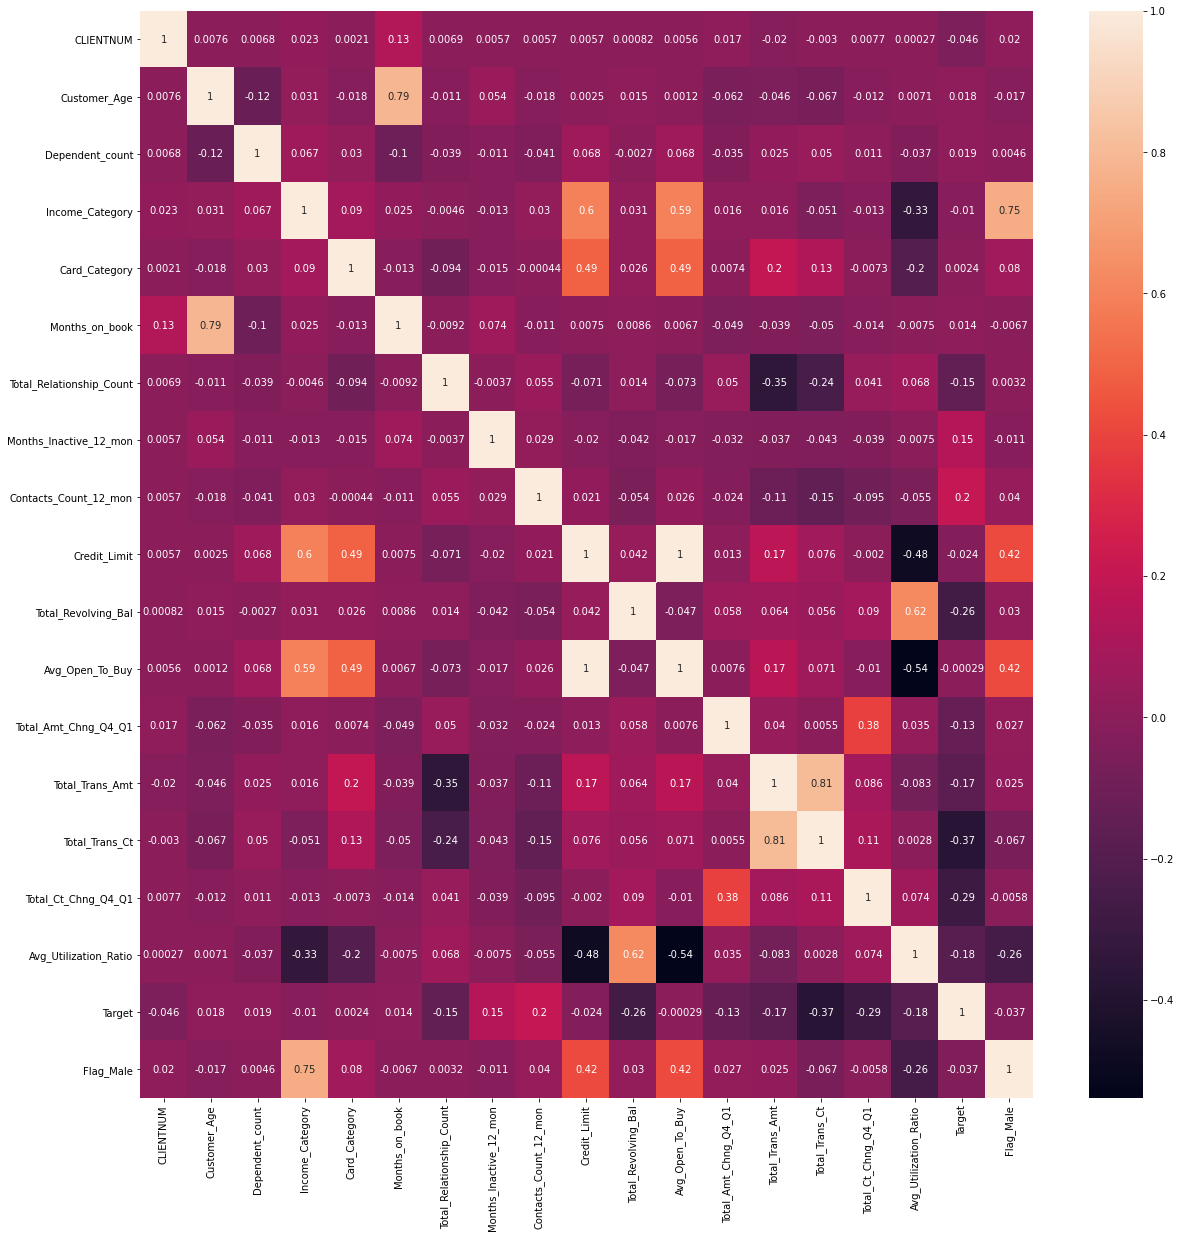

In [71]:
corrMatrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()